In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_recall_curve,roc_curve,classification_report,confusion_matrix,f1_score
from sklearn.metrics import mean_squared_error,plot_precision_recall_curve
from matplotlib import style
from sklearn.metrics import precision_score,recall_score
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

SEED = 42

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-QCKF924P;'
                      'Database=BankMarketing;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
df = pd.read_sql_query('SELECT * FROM BankMarketing.dbo.bank_cus',conn)
df = df.drop(columns=['customerID'])

In [3]:
df.to_excel("output.xlsx",
             sheet_name='Sheet1')

In [4]:
# This function provides statisitcal description like mean,max,min etc of every numeric column
df.describe()

,age,balance,campaignDay,duration,campaign,pdays,previous
count,30907.000000,30907.000000,30907.000000,30907.000000,30907.000000,30907.000000,30907.000000
mean,40.918918,1425.760701,15.967257,260.485003,2.751318,55.944835,0.808490
std,10.922583,3190.967030,8.226736,257.783963,2.954412,112.726930,2.706169
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,80.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,473.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,48.000000,1502.500000,21.000000,322.000000,3.000000,10.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,50.000000,871.000000,275.000000


In [5]:
#This function shows datatype of each column size of total dataset and number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30907 entries, 0 to 30906
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30907 non-null  int64 
 1   job             30907 non-null  object
 2   marital_status  30907 non-null  object
 3   education       30907 non-null  object
 4   defaulted       30907 non-null  object
 5   balance         30907 non-null  int64 
 6   housing         30907 non-null  object
 7   loan            30907 non-null  object
 8   contact         30907 non-null  object
 9   campaignDay     30907 non-null  int64 
 10  campaignMonth   30907 non-null  object
 11  duration        30907 non-null  int64 
 12  campaign        30907 non-null  int64 
 13  pdays           30907 non-null  int64 
 14  previous        30907 non-null  int64 
 15  pOutcome        30907 non-null  object
 16  subscribed      30907 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.0+ MB


In [6]:
# Columns present in dataset
df.columns

Index(['age', 'job', 'marital_status', 'education', 'defaulted', 'balance',
       'housing', 'loan', 'contact', 'campaignDay', 'campaignMonth',
       'duration', 'campaign', 'pdays', 'previous', 'pOutcome', 'subscribed'],
      dtype='object')

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
# checking nulls in datset
df.isna().sum()

age               0
job               0
marital_status    0
education         0
defaulted         0
balance           0
housing           0
loan              0
contact           0
campaignDay       0
campaignMonth     0
duration          0
campaign          0
pdays             0
previous          0
pOutcome          0
subscribed        0
dtype: int64

In [9]:
df.to_csv('output.csv',index=False)

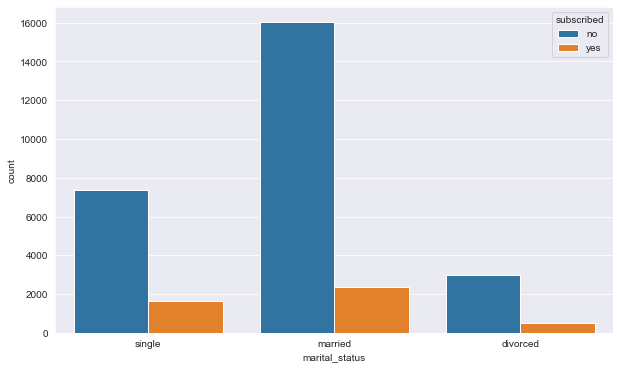

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital_status',hue='subscribed',data=df);

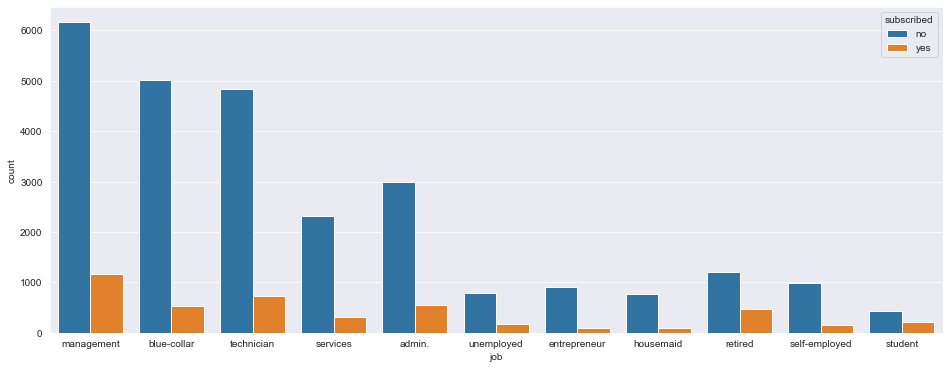

In [11]:
plt.figure(figsize=(16,6))
sns.countplot(x='job',hue='subscribed',data=df);

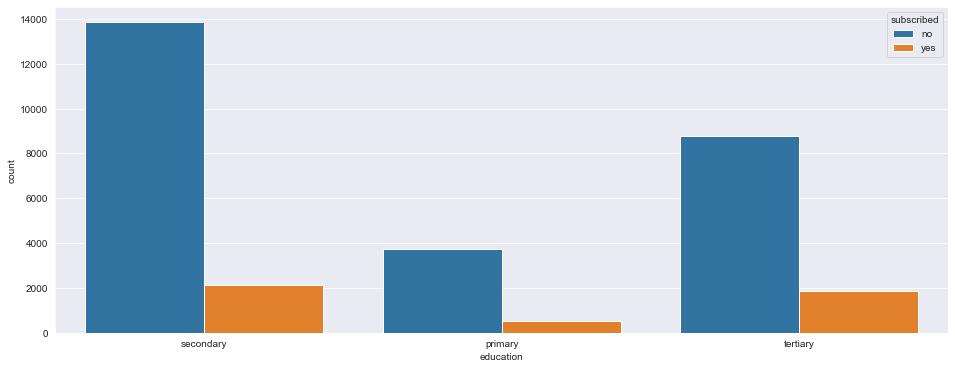

In [12]:
plt.figure(figsize=(16,6))
sns.countplot(x='education',hue='subscribed',data=df);

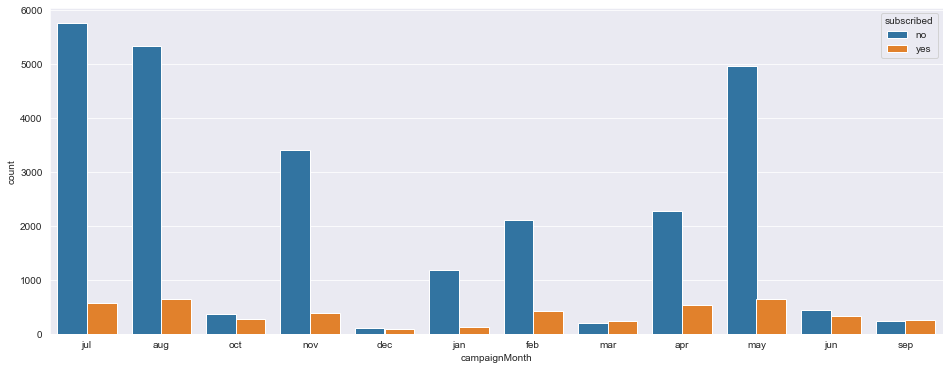

In [13]:
plt.figure(figsize=(16,6))
sns.countplot(x='campaignMonth',hue='subscribed',data=df);

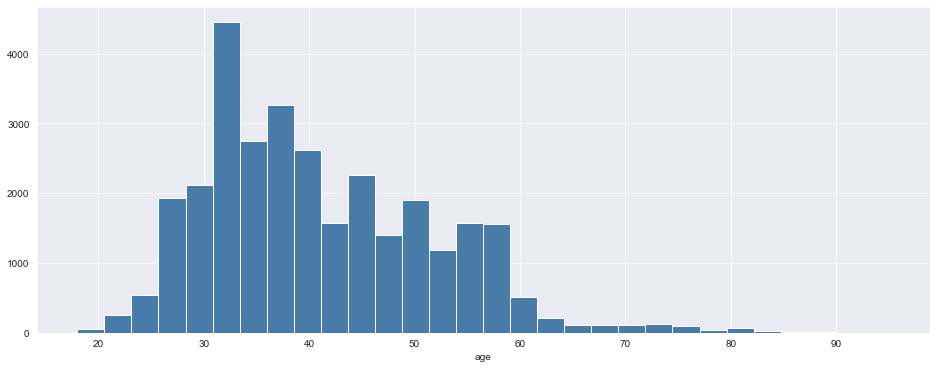

In [14]:
# Age distribution 
plt.figure(figsize=(16,6))
df['age'].hist(bins=30,color='#477CA8')
plt.xlabel('age')
plt.show()

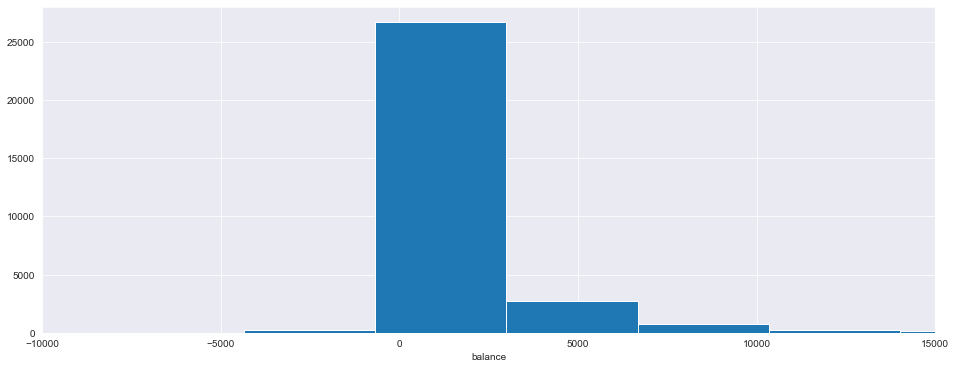

In [15]:
# Age distribution 
plt.figure(figsize=(16,6))
df['balance'].hist(bins=30)
plt.xlabel('balance')
plt.xlim(-10000,15000)
plt.show()

<AxesSubplot:xlabel='subscribed', ylabel='count'>

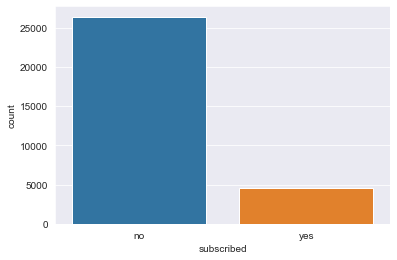

In [16]:
sns.countplot(df['subscribed'])

In [17]:
le=LabelEncoder()
df['subscribed']=le.fit_transform(df['subscribed'])

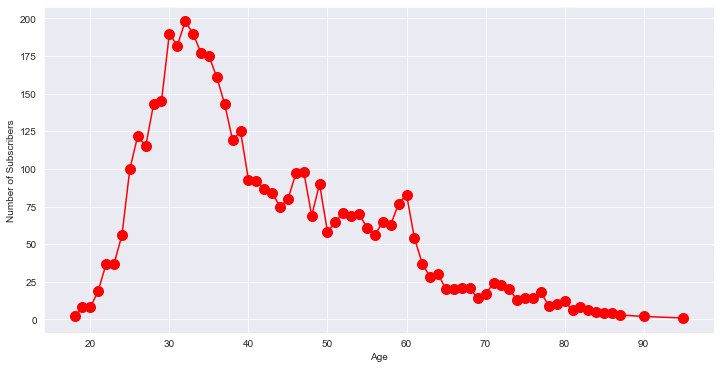

Text(0, 0.5, 'Balance')

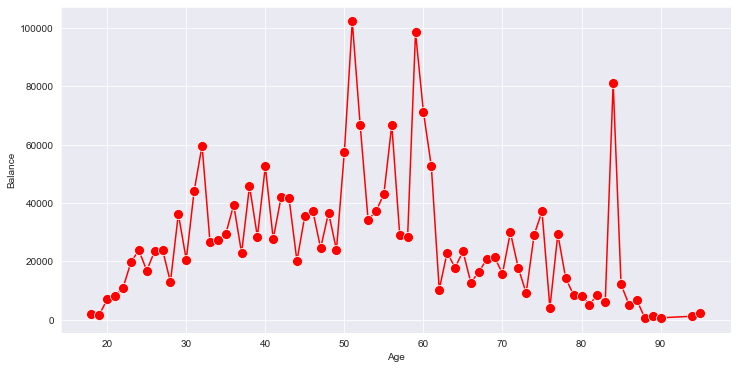

In [18]:
results=df.groupby(df['age']).agg('max').reset_index()
result1=df[df['subscribed']==1].groupby(df['age'])[['subscribed','balance']].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(result1['age'],result1['subscribed'],marker='o',color='red',markerfacecolor='red',markersize=10)
plt.xlabel('Age')
plt.ylabel('Number of Subscribers')
plt.show()
plt.figure(figsize=(12,6))
sns.lineplot(results['age'],results['balance'],marker='o',color='red',markerfacecolor='red',markersize=10)
plt.xlabel('Age')
plt.ylabel('Balance')

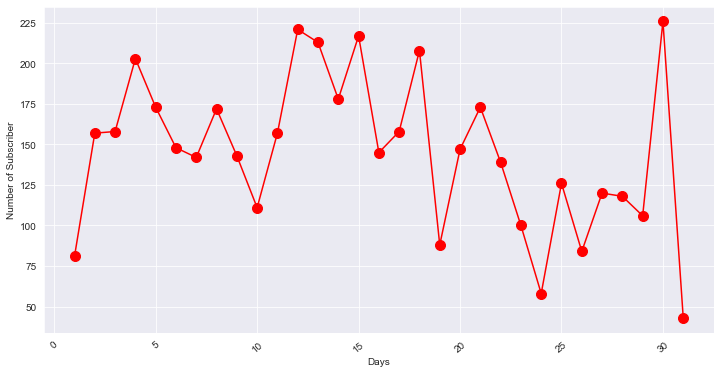

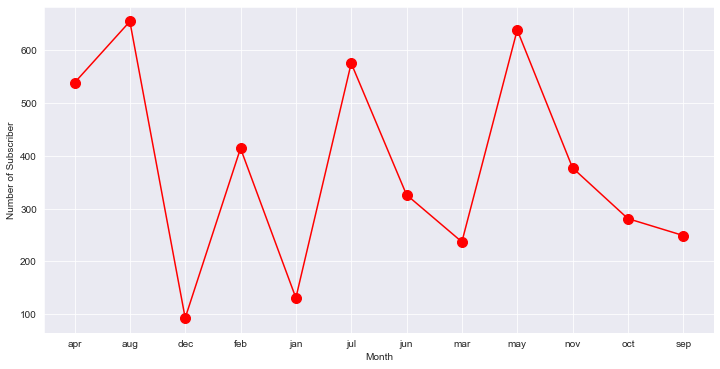

In [19]:
results10=df[df['subscribed']==1].groupby(df['campaignDay'])[['subscribed','balance']].sum().reset_index()
results2=df[df['subscribed']==1].groupby(df['campaignMonth'])[['subscribed','balance']].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(results10['campaignDay'],results10['subscribed'],marker='o',color='red',markerfacecolor='red',markersize=10)
plt.xlabel('Days')
plt.ylabel('Number of Subscriber')
plt.xticks(rotation=40)
plt.figure(figsize=(12,6))
plt.plot(results2['campaignMonth'],results2['subscribed'],marker='o',color='red',markerfacecolor='red',markersize=10)
plt.xlabel('Month')
plt.ylabel('Number of Subscriber')
plt.show()

#### Hot labelEncoder for labeling the data

In [20]:
object_columns =[]
for i in df.columns:
    if df[i].dtype == 'object':
        object_columns.append(i)
    

In [21]:
le=LabelEncoder()
for i in object_columns:
      df[i]=le.fit_transform(df[i])

In [22]:
df

,age,job,marital_status,education,defaulted,balance,housing,loan,contact,campaignDay,campaignMonth,duration,campaign,pdays,previous,pOutcome,subscribed
0,27,4,2,1,0,35,0,0,0,4,5,255,1,-1,0,3,0
1,54,1,1,0,0,466,0,0,0,4,5,297,1,-1,0,3,0
2,43,1,1,1,0,105,0,1,0,4,5,668,2,-1,0,3,0
3,31,9,2,1,0,19,0,0,1,4,5,65,2,-1,0,3,0
4,27,9,2,1,0,126,1,1,0,4,5,436,4,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
30903,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
30904,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
30905,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [23]:
X=df.drop(['subscribed'],axis=1)
y=df['subscribed']

Balancing Data

Imbalanced data sets are a special case for classification problems where the class distribution is not uniform among the classes. Typically, they are composed of two classes: The majority (negative) class and the minority (positive) class. So we have to balance the minority class with the majority class

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sam,y_sam = smote.fit_resample(X,y)

In [25]:
print("x_sam Shape: ",x_sam.shape)
print("y_sam Shape: ",y_sam.shape)

x_sam Shape:  (52788, 16)
y_sam Shape:  (52788,)


In [26]:
# Lists to keep track of model metrics
models = []
precision_list = []
recall_list = []
f1_score_list = []
training_acc_list = []
testing_acc_list = []

In [27]:
Scaler=StandardScaler()
X_sam_Scale=Scaler.fit_transform(x_sam)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_sam_Scale,y_sam,test_size=0.8)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lgr =LogisticRegression(random_state = SEED)
lgr.fit(X_train,y_train)
pred=lgr.predict(X_test)
accuracy_score(y_test,pred)

0.8284909189931566

In [31]:
params=[
{ 

    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    "penalty":['l1', 'l2', 'elasticnet'],
    
}
]
model_lr=LogisticRegression(random_state = SEED)
model_lr_CV=GridSearchCV(model_lr,
                          param_grid=params,
                          cv=5,
                          scoring='accuracy')
model_lr_CV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='accuracy')

In [32]:
print("-------------------------------------------------------------")
print('Best solver:', model_lr_CV.best_estimator_.get_params()['solver'])
print('Best penalty:', model_lr_CV.best_estimator_.get_params()['penalty'])

print("-------------------------")
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_lr_CV.best_score_:.3f}'
)

-------------------------------------------------------------
Best solver: sag
Best penalty: l2
-------------------------
Mean cross-validated accuracy score of the best_estimator: 0.829


In [33]:
lr=LogisticRegression(solver='saga',penalty='l1',random_state = SEED)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83     21151
           1       0.82      0.85      0.83     21080

    accuracy                           0.83     42231
   macro avg       0.83      0.83      0.83     42231
weighted avg       0.83      0.83      0.83     42231



In [35]:
models.append('Logistic Regression')
precision_list.append(precision_score(y_test, y_pred_lr, average='macro'))
recall_list.append(recall_score(y_test, y_pred_lr, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred_lr, average='macro'))
training_acc_list.append(accuracy_score(y_train, lr.predict(X_train)))
testing_acc_list.append(accuracy_score(y_test, y_pred_lr))

In [36]:
print("Accuracy of lr:",accuracy_score(y_test,y_pred_lr))
print("precision of lr:",precision_score(y_test,y_pred_lr,average='macro'))
print("Recall of lr:",recall_score(y_test,y_pred_lr))
print("f1_score of lr:",f1_score(y_test,y_pred_lr))
print("Mean_squared_error of lr",mean_squared_error(y_test,y_pred_lr))

Accuracy of lr: 0.8284909189931566
precision of lr: 0.8289992980708574
Recall of lr: 0.8481024667931689
f1_score of lr: 0.8315542221912138
Mean_squared_error of lr 0.1715090810068433


<AxesSubplot:>

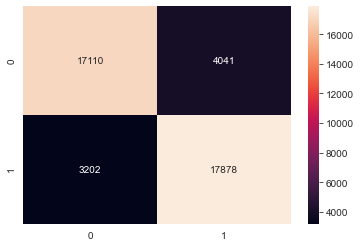

In [37]:
cm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,cmap="rocket",fmt='d')

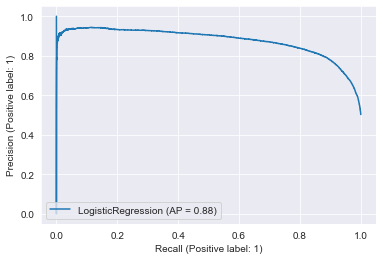

In [38]:
disp = plot_precision_recall_curve(lr, X_test, y_test)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtc=DecisionTreeClassifier(random_state=SEED)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred_dtc)

0.8216476048400464

In [42]:
params={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}
model_dct=DecisionTreeClassifier(random_state = SEED)
model_dct_CV=GridSearchCV(model_dct,
                          param_grid=params,
                          cv=5,verbose=1,
                          n_jobs=-1)
model_dct_CV.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [43]:
print('Best criterion :', model_dct_CV.best_estimator_.get_params()['criterion'])
print('Best max_depth Value :', model_dct_CV.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split Value :', model_dct_CV.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf Value :', model_dct_CV.best_estimator_.get_params()['max_depth'])
print("-------------------------")
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_dct_CV.best_score_:.3f}'
)

Best criterion : entropy
Best max_depth Value : 9
Best min_samples_split Value : 8
Best min_samples_leaf Value : 9
-------------------------
Mean cross-validated accuracy score of the best_estimator: 0.839


In [44]:
dtc=DecisionTreeClassifier(criterion='gini',
                           max_depth=9,
                          min_samples_split=2,
                          min_samples_leaf=9,random_state = SEED)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83     21151
           1       0.82      0.87      0.84     21080

    accuracy                           0.84     42231
   macro avg       0.84      0.84      0.84     42231
weighted avg       0.84      0.84      0.84     42231



In [45]:
models.append('Decision Tree')
precision_list.append(precision_score(y_test, y_pred_dtc, average='macro'))
recall_list.append(recall_score(y_test, y_pred_dtc, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred_dtc, average='macro'))
training_acc_list.append(accuracy_score(y_train, dtc.predict(X_train)))
testing_acc_list.append(accuracy_score(y_test, y_pred_dtc))

[Text(0, 0.5, 'Not '), Text(0, 1.5, 'Yes')]

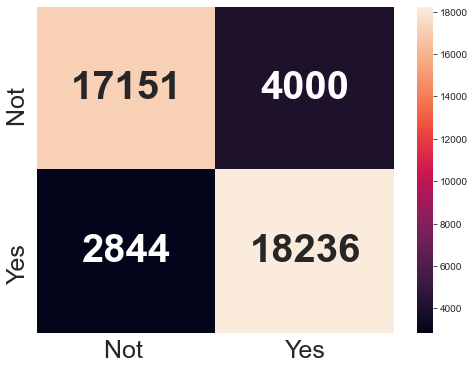

In [46]:
cm=confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(8,6))
ax=x=sns.heatmap(cm,annot=True,fmt='d',cmap='rocket',annot_kws={'size':40,'weight':'bold'})
Labels=['Not ','Yes']
ax.set_xticklabels(Labels,fontsize=25)
ax.set_yticklabels(Labels,fontsize=25)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier(random_state = SEED)
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
accuracy_score(y_test,pred)

0.888044327626625

In [51]:
params={
    "max_depth":[2, 8, 16],
    "n_estimators" :[64,128,200]
}
model_rf=RandomForestClassifier(random_state = SEED)
model_rf_CV=GridSearchCV(model_rf,
                          param_grid=params,
                          cv=5,
                          scoring='accuracy',
                          )
model_rf_CV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 8, 16],
                         'n_estimators': [64, 128, 200]},
             scoring='accuracy')

In [52]:
print('Best max_depth:', model_rf_CV.best_estimator_.get_params()['max_depth'])
print('Best n_estimators:', model_rf_CV.best_estimator_.get_params()['n_estimators'])
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_rf_CV.best_score_:.3f}'
)

Best max_depth: 16
Best n_estimators: 200
Mean cross-validated accuracy score of the best_estimator: 0.877


In [53]:
rf=RandomForestClassifier(n_estimators=200,max_depth=8,random_state = SEED)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [54]:
print("Accuracy of rf:",accuracy_score(y_test,y_pred_rf))
print("precision of rf:",precision_score(y_test,y_pred_rf,average='macro'))
print("Recall of rf:",recall_score(y_test,y_pred_rf))
print("f1_score of rf:",f1_score(y_test,y_pred_rf))
print("Mean_squared_error of rf",mean_squared_error(y_test,y_pred_rf))

Accuracy of rf: 0.8621628661409865
precision of rf: 0.8637383692220548
Recall of rf: 0.8951612903225806
f1_score of rf: 0.8663712954248066
Mean_squared_error of rf 0.13783713385901353


In [55]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     21151
           1       0.84      0.90      0.87     21080

    accuracy                           0.86     42231
   macro avg       0.86      0.86      0.86     42231
weighted avg       0.86      0.86      0.86     42231



In [56]:
models.append('Random Forest')
precision_list.append(precision_score(y_test, y_pred_rf, average='macro'))
recall_list.append(recall_score(y_test, y_pred_rf, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred_rf, average='macro'))
training_acc_list.append(accuracy_score(y_train, rf.predict(X_train)))
testing_acc_list.append(accuracy_score(y_test, y_pred_rf))

[Text(0, 0.5, 'Not Subscribed'), Text(0, 1.5, 'Subscribed')]

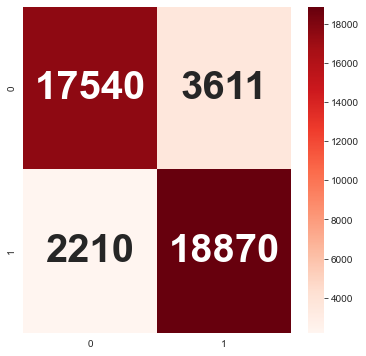

In [57]:
cm=confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',annot_kws={'size':40,'weight':'bold'})
Labels=['Not Subscribed','Subscribed']
ax.set_xticklabels(Labels,fontsize=25)
ax.set_yticklabels(Labels,fontsize=25)

In [58]:
model_metrics = pd.DataFrame(zip(models, training_acc_list, testing_acc_list,
                                 precision_list, recall_list, f1_score_list), 
                             columns=['Model', 'Training Acc', 'Testing Acc', 'Precision', 'Recall', 'F1 Score'])

In [59]:
model_metrics.sort_values(by='F1 Score', ascending=False)

,Model,Training Acc,Testing Acc,Precision,Recall,F1 Score
2,Random Forest,0.886521,0.862163,0.863738,0.862218,0.862026
1,Decision Tree,0.874396,0.837939,0.838938,0.837985,0.837832
0,Logistic Regression,0.830634,0.828491,0.828999,0.828524,0.828434


In [60]:
# Creating the feature importances dataframe
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)

<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

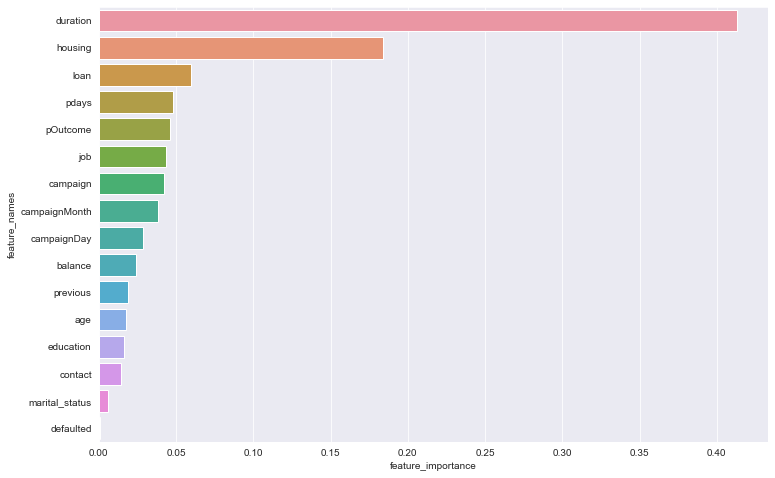

In [61]:
plt.figure(figsize=(12,8))
sns.barplot(x=feat_imp_sorted['feature_importance'], y=feat_imp_sorted['feature_names'])

In [62]:
mlRecords = []

In [63]:
#looping to append the model results into array
for i in range(len(models)):
    mlRecords.append((models[i], training_acc_list[i], testing_acc_list[i],
                                 precision_list[i], recall_list[i], f1_score_list[i]))
    

In [64]:
mlRecords

[('Logistic Regression',
  0.8306337027564649,
  0.8284909189931566,
  0.8289992980708574,
  0.8285238351648223,
  0.8284341788427549),
 ('Decision Tree',
  0.8743961352657005,
  0.8379389547962397,
  0.838937985980575,
  0.8379845175788048,
  0.8378319108416523),
 ('Random Forest',
  0.8865207918916359,
  0.8621628661409865,
  0.8637383692220548,
  0.8622182509482508,
  0.8620260183634876)]

In [65]:
#execute sql query
cursor.executemany('INSERT INTO ML_Results VALUES(?,?,?,?,?,?);',mlRecords);

In [66]:
#commit the insert
conn.commit()

In [67]:
#check if insert data is correct

In [68]:
MLResults_df = pd.read_sql_query('SELECT * FROM ML_Results',conn)

In [69]:
MLResults_df

,modelID,modelName,trainingAcc,testingAcc,modelPrecision,modelRecall,f1Score
0,1,Logistic Regression,0.827034,0.829438,0.830067,0.829497,0.829373
1,2,Decision Tree,0.873828,0.849329,0.850518,0.849408,0.849220
2,3,Random Forest,0.885952,0.864341,0.866383,0.864443,0.864175
3,4,Logistic Regression,0.827413,0.827875,0.829211,0.828013,0.827739
4,5,Decision Tree,0.878564,0.841704,0.843120,0.841843,0.841576
5,6,Random Forest,0.890499,0.861737,0.864520,0.861926,0.861514
6,7,Logistic Regression,0.826655,0.828728,0.829188,0.828748,0.828674
7,8,Decision Tree,0.866250,0.839502,0.839935,0.839521,0.839456
8,9,Random Forest,0.881690,0.860458,0.862209,0.860495,0.860298
9,10,Logistic Regression,0.830634,0.828491,0.828999,0.828524,0.828434
